In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr

import wrangle as w

opening data from local file


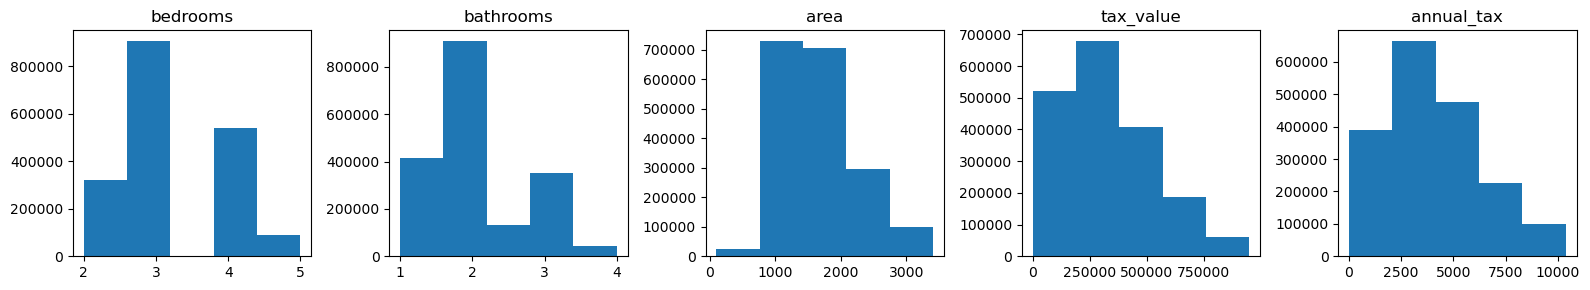

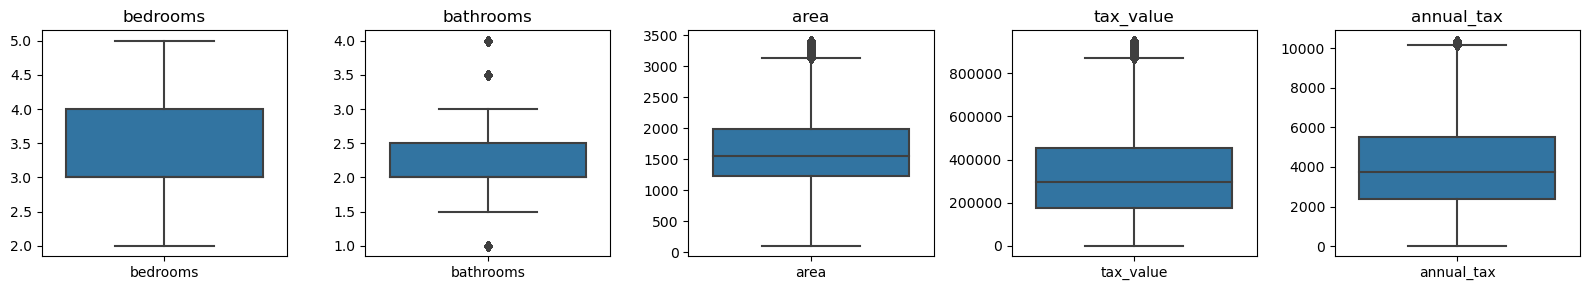

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
df = w.acquire_zillow_sfr()

opening data from local file


In [4]:
df.isna().sum()

bedrooms        11
bathrooms       11
area          8484
tax_value      493
year_built    9337
annual_tax    4442
fips             0
dtype: int64

<AxesSubplot:>

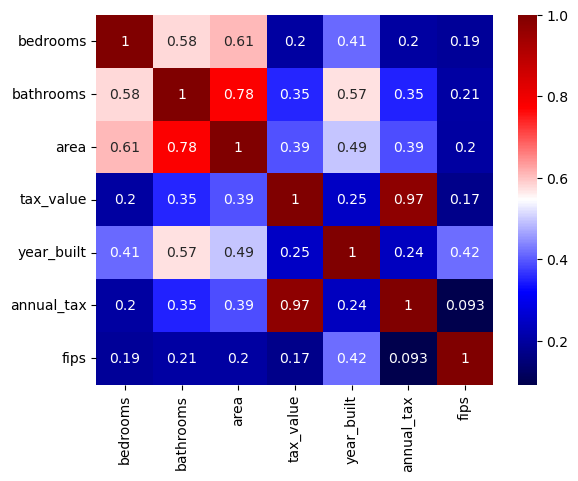

In [5]:
sns.heatmap(train.corr(method='spearman'), cmap='seismic', annot=True)

In [6]:
df.shape

(2152863, 7)

In [7]:
# def plot_variable_pairs(df, ):

In [8]:
# df = df[df.lot_size < 100000]

In [9]:
vis_sample = train.sample(1000)

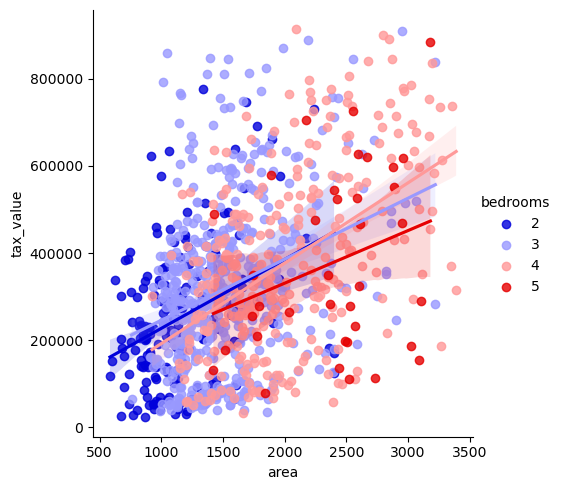

In [10]:
sns.lmplot(data=vis_sample,
           x='area',
           y='tax_value',
           hue='bedrooms',
           scatter=True,
           palette='seismic')
plt.show()

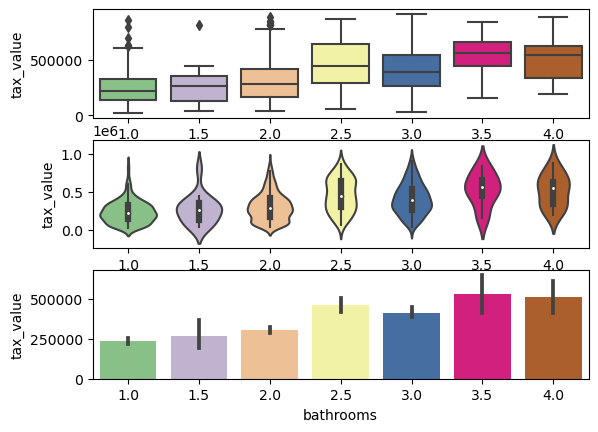

In [11]:
plt.subplot(311)
sns.boxplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.subplot(312)
sns.violinplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.subplot(313)
sns.barplot(x='bathrooms', y='tax_value', data=vis_sample, palette='Accent')
plt.show()

In [12]:
(1855276 / 2152863) - (1665830 / 2152863)

0.087997239025428

In [13]:
br_1 = train[train.bedrooms == 1]
br_2 = train[train.bedrooms == 2]
br_3 = train[train.bedrooms == 3]
br_4 = train[train.bedrooms == 4]
br_5 = train[train.bedrooms == 5]

In [14]:
train[train.bedrooms == 2]

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips
599581,2,2.0,897,186833,1942,2499.79,6037
232947,2,1.0,765,218015,1948,2830.39,6037
562823,2,1.0,1066,428442,1940,5504.31,6037
1909164,2,2.0,1294,362435,1950,4708.13,6037
1736522,2,2.0,1802,119495,1949,1629.11,6037
...,...,...,...,...,...,...,...
2429,2,2.0,1282,84411,1988,1866.11,6037
1902537,2,1.0,1275,286920,1955,3491.04,6059
554089,2,1.0,1214,277388,1939,3641.91,6037
877535,2,1.0,832,52971,1950,975.09,6037


In [15]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,annual_tax,fips
1654597,3,1.0,947,128661,1954,1870.84,6037
328510,3,2.0,1076,244696,1950,3160.45,6037
599581,2,2.0,897,186833,1942,2499.79,6037
967268,4,2.5,2520,407094,1977,4680.38,6059
1495491,3,2.0,1922,134523,1976,1467.24,6059


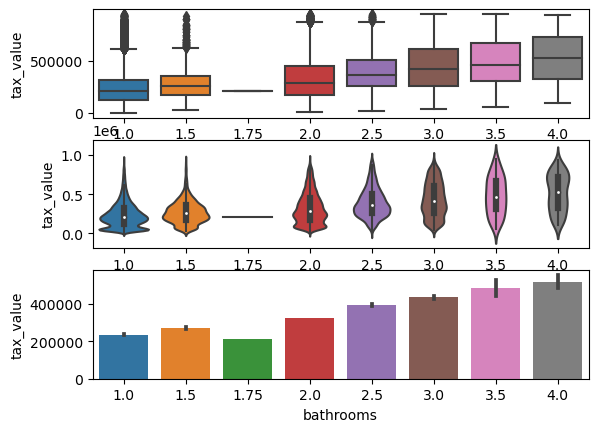

In [16]:
plt.subplot(311)
sns.boxplot(x='bathrooms', y='tax_value', data=br_2)
plt.subplot(312)
sns.violinplot(x='bathrooms', y='tax_value', data=br_2)
plt.subplot(313)
sns.barplot(x='bathrooms', y='tax_value', data=br_2)
plt.show()

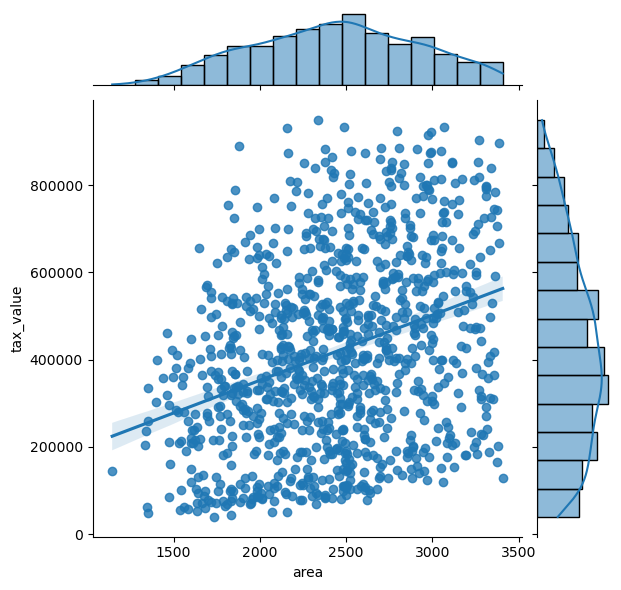

In [17]:
sns.jointplot(x="area", y="tax_value", data=br_5.sample(1000),  kind='reg')
plt.show()

# 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [18]:
def plot_variable_pairs(df):
    sample = df.sample(1000)
    sns.pairplot(sample, corner=True, kind='reg', plot_kws={'color': 'blue'})
    plt.show()

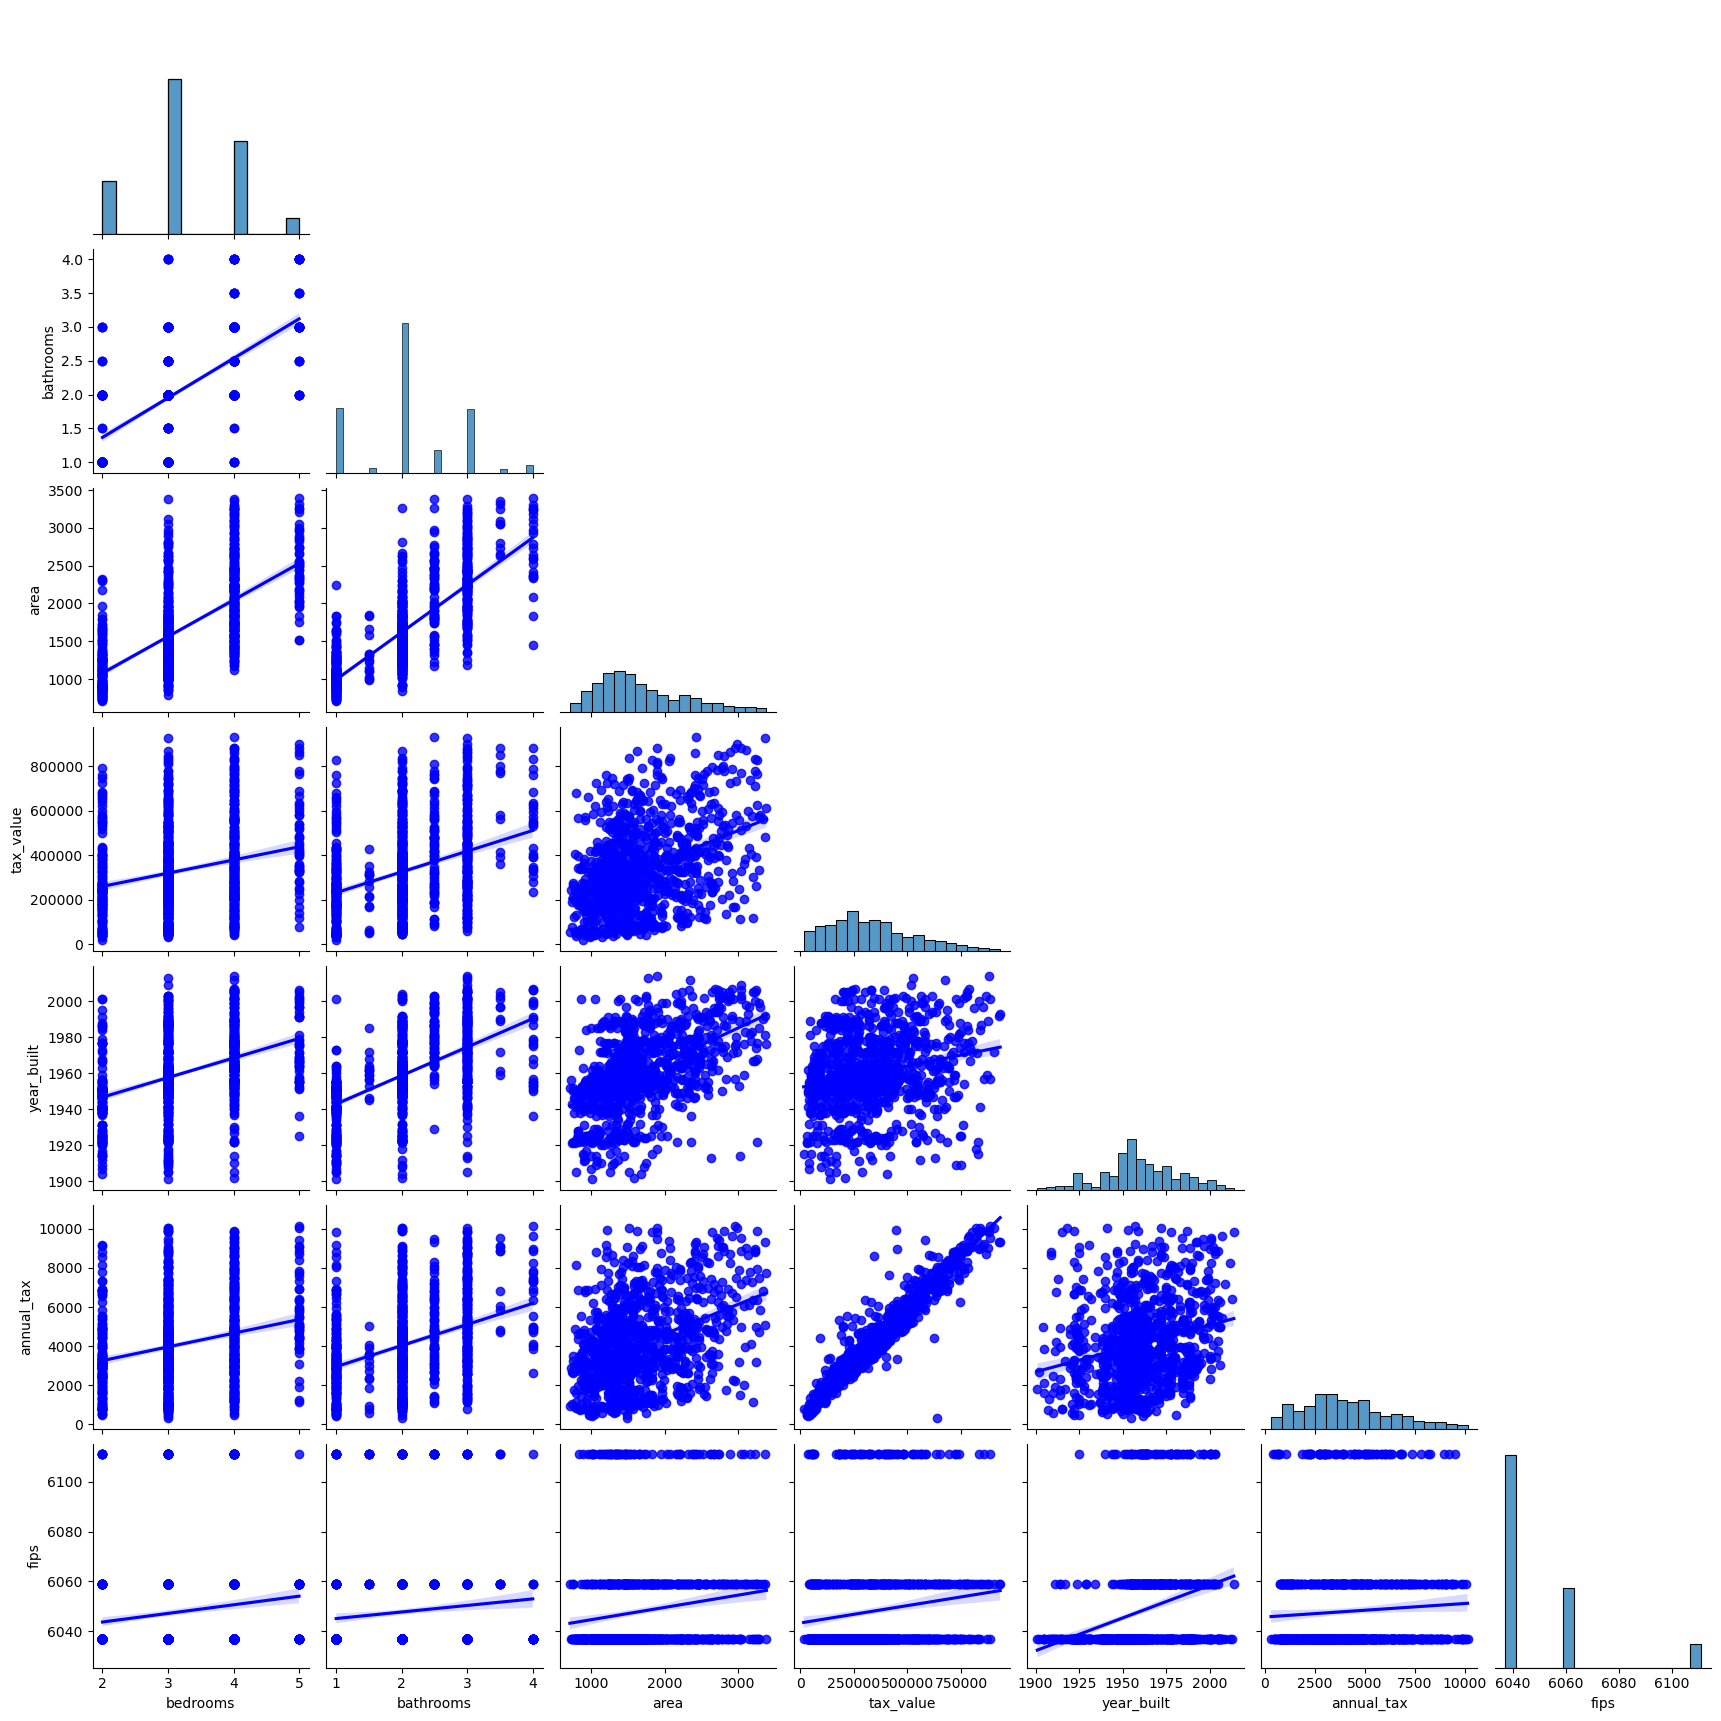

In [19]:
plot_variable_pairs(train)

# 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [29]:
len(train.bathrooms.value_counts())

8

In [32]:
mask = ((train.dtypes == 'O') | (len(train.value_counts()) <= 10))
train[mask].columns.to_list()

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1477/3442110172.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train[mask].columns.to_list()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [22]:
def plot_categorical_and_continuous_vars(df):
    cat_cols, num_cols = [], []
    for col in df.columns:
        if df[col].dtype == 'O':
            cat_cols.append(col)
        else:
            if df[col].nunique() < 10:
                cat_cols.append(col)
            else:
                num_cols.append(col)
    
    for col in df.columns:
        
        plt.subplot(311)
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.subplot(312)
        sns.violinplot(x='bathrooms', y='tax_value', data=df)
        plt.subplot(313)
        sns.barplot(x='bathrooms', y='tax_value', data=df)
        plt.show()